In [1]:
from src.data import shape_processor
import geopandas as gpd

In [2]:
seki_outline = gpd.read_file("../../data/shapefiles/SEKI_outline.shp")
sierra_conservancy = gpd.read_file("../../data/shapefiles/Subregions_of_the_Sierra_Nevada_Conservancy.shp")

In [3]:
# Convert each shape as one by taking the union of all subrows.
# Converts to CRS 4326 because that's what's being used by the GEDI data download pipeline.
seki_as_one = shape_processor.get_union(seki_outline, 4326)
sierras_as_one = shape_processor.get_union(sierra_conservancy, 4326)

# Save unified shape files
seki_as_one.to_file("../../data/shapefiles/seki.shp")
sierras_as_one.to_file("../../data/shapefiles/sierras.shp")


In [4]:
seki_convex_hull = shape_processor.get_convex_hull(seki_outline, 4326)
sierras_convex_hull = shape_processor.get_convex_hull(sierra_conservancy, 4326)

# Save unified shape files
seki_convex_hull.to_file("../../data/shapefiles/seki_convex_hull.shp")
sierras_convex_hull.to_file("../../data/shapefiles/sierras_convex_hull.shp")

<Axes: >

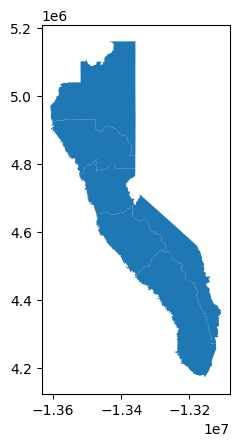

In [12]:
sierra_conservancy.plot()

<Axes: >

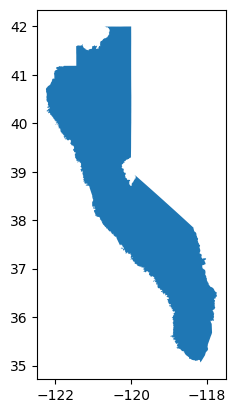

In [13]:
sierras_as_one.plot()

In [19]:
sierras_convex_hull.to_crs(3310).area / 10**6

0    145646.620902
dtype: float64

In [18]:
sierras_as_one.to_crs(1739).area / 10**6

CRSError: Invalid projection: EPSG:1739: (Internal Proj Error: proj_create: crs not found)

Area of convex_hull to original shape: 1.3824684793750086
Area of box to original shape: 2.0041307442066896


/var/folders/2q/26zyw9sd5cldkn81_ymfw6dh0000gn/T/ipykernel_69568/2307791823.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(f'Area of convex_hull to original shape: {float(seki_convex_hull.geometry.area / seki_as_one.geometry.area)}')
/var/folders/2q/26zyw9sd5cldkn81_ymfw6dh0000gn/T/ipykernel_69568/2307791823.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(f'Area of box to original shape: {float(shape_processor.get_box(seki_as_one).geometry.area / seki_as_one.geometry.area)}')


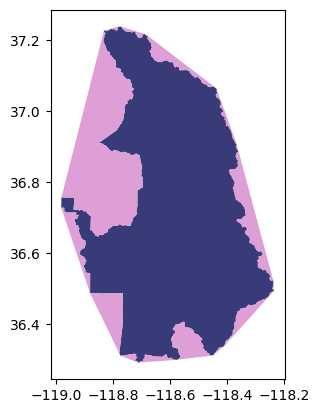

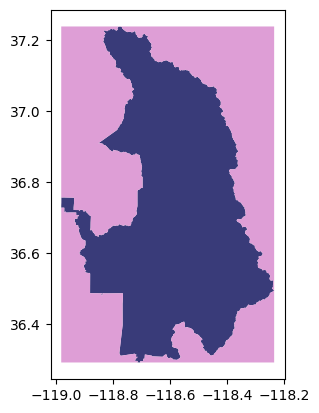

In [10]:
seki_as_one.overlay(seki_convex_hull, how='union').plot(cmap='tab20b')
seki_as_one.overlay(shape_processor.get_box(seki_as_one), how='union').plot(cmap='tab20b')

print(f'Area of convex_hull to original shape: {float(seki_convex_hull.geometry.area / seki_as_one.geometry.area)}')
print(f'Area of box to original shape: {float(shape_processor.get_box(seki_as_one).geometry.area / seki_as_one.geometry.area)}')

Area of convex_hull to original shape: 1.4030614273601987
Area of box to original shape: 2.9122388199076594


/var/folders/2q/26zyw9sd5cldkn81_ymfw6dh0000gn/T/ipykernel_69568/2661638397.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(f'Area of convex_hull to original shape: {float(sierras_convex_hull.geometry.area / sierras_as_one.geometry.area)}')
/var/folders/2q/26zyw9sd5cldkn81_ymfw6dh0000gn/T/ipykernel_69568/2661638397.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(f'Area of box to original shape: {float(shape_processor.get_box(sierras_as_one).geometry.area / sierras_as_one.geometry.area)}')


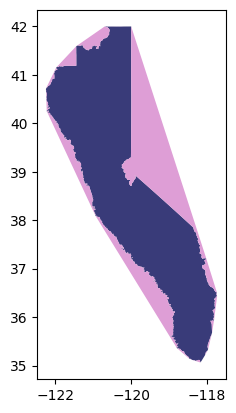

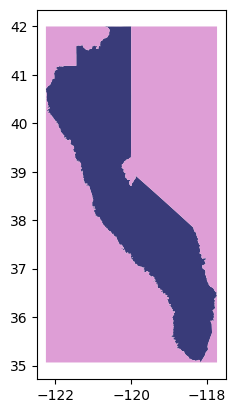

In [12]:
sierras_as_one.overlay(sierras_convex_hull, how='union').plot(cmap='tab20b')
sierras_as_one.overlay(shape_processor.get_box(sierras_as_one), how='union').plot(cmap='tab20b')

print(f'Area of convex_hull to original shape: {float(sierras_convex_hull.geometry.area / sierras_as_one.geometry.area)}')
print(f'Area of box to original shape: {float(shape_processor.get_box(sierras_as_one).geometry.area / sierras_as_one.geometry.area)}')